In [1]:
%load_ext autoreload
%autoreload 2

## Imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import logging
import sys
import os

logger = logging.getLogger(__name__)
filename_ = os.path.basename(globals()["__vsc_ipynb_file__"])
logging.basicConfig(
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler(filename="./logs/logs.log", mode="w"),
    ],
    level=logging.INFO,
    format=f"%(asctime)s - {filename_} - %(name)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    force=True,
)

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin

# Models
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

from sklearn.datasets import load_wine, load_breast_cancer

data = load_breast_cancer()

In [3]:


X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
logger.info("Data loaded")

2024-04-19 00:24:58 - v1.ipynb - __main__ - INFO - Data loaded


In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.5, random_state=42, stratify=y_val
)
logger.info(f"{X_train.shape=}, {X_val.shape=}, {X_test.shape=}")

2024-04-19 00:24:58 - v1.ipynb - __main__ - INFO - X_train.shape=(398, 30), X_val.shape=(85, 30), X_test.shape=(86, 30)


In [5]:
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval
# from hyperopt.early_stop import no_progress_loss


# class BoostingEnsembleClassifier(BaseEstimator, ClassifierMixin):
#     def super().__init__(self, n_classes, final_model=None, hpo_params=False):
#         super().__init__()a
#         self.n_classes = n_classes
#         self.final_model = final_model
#         self.hpo_params = hpo_params
#         self.models = [
#             xgb.XGBClassifier(),
#             lgb.LGBMClassifier(verbose=-1),
#             ctb.CatBoostClassifier(verbose=0),
#         ]
#         self.best_params = {}
#         self.final_model_params = {}

#     def fit_meta_models(self, X, y):
#         for model in self.models:
#             if self.hpo_params:
#                 model_name = model.__class__.__name__
#                 best_params = self.hyperopt_model(model, X, y)
#                 model.set_params(**best_params)
#                 self.best_params[model_name] = model.get_params()
#             model.fit(X, y)

#     def hyperopt_model(self, model, X, y):

#         model_name = model.__class__.__name__
#         if model_name == "XGBClassifier":
#             search_space = {
#                 "max_depth": hp.choice("max_depth", np.arange(1, 20, 1, dtype=int)),
#                 "eta": hp.uniform("eta", 0, 1),
#                 "gamma": hp.uniform("gamma", 0, 10e1),
#                 "reg_alpha": hp.uniform("reg_alpha", 10e-7, 10),
#                 "reg_lambda": hp.uniform("reg_lambda", 0, 1),
#                 "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1),
#                 "colsample_bynode": hp.uniform("colsample_bynode", 0.5, 1),
#                 "colsample_bylevel": hp.uniform("colsample_bylevel", 0.5, 1),
#                 "min_child_weight": hp.choice(
#                     "min_child_weight", np.arange(1, 10, 1, dtype="int")
#                 ),
#                 "max_delta_step": hp.choice(
#                     "max_delta_step", np.arange(1, 10, 1, dtype="int")
#                 ),
#                 "subsample": hp.uniform("subsample", 0.5, 1),
#                 "objective": ("multi:softmax"),
#                 "eval_metric": "auc" if self.n_classes == 2 else "mlogloss",
#                 "seed": 44,
#                 "num_class": self.n_classes,
#             }

#             def objective(space):
#                 dtrain = xgb.DMatrix(X, y)
#                 results = xgb.cv(
#                     space,
#                     dtrain=dtrain,
#                     metrics=["mlogloss"],
#                     **self.hpo_params,
#                 )

#                 best_score = results["test-mlogloss-mean"].max()
#                 return {"loss": -best_score, "status": STATUS_OK}

#         elif model_name == "LGBMClassifier":
#             search_space = {
#                 "learning_rate": hp.loguniform(
#                     "learning_rate", np.log(0.01), np.log(0.2)
#                 ),
#                 "num_leaves": hp.choice("num_leaves", np.arange(2, 100, 1, dtype=int)),
#                 "max_depth": hp.choice("max_depth", np.arange(1, 20, 1, dtype=int)),
#                 "subsample": hp.uniform("subsample", 0.5, 1),
#                 "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1),
#                 "min_child_weight": hp.quniform("min_child_weight", 1, 6, 1),
#                 "reg_alpha": hp.uniform("reg_alpha", 0, 1),
#                 "reg_lambda": hp.uniform("reg_lambda", 0, 1),
#                 "n_jobs": 2,
#                 "random_state": 42,
#                 "verbose": -1,
#                 "verbose_eval": -1,
#             }

#             def objective(space):
#                 metric_ = "multi_logloss" if self.n_classes > 2 else "binary_logloss"
#                 results = lgb.cv(
#                     space,
#                     lgb.Dataset(X, label=y),
#                     callbacks=[
#                         lgb.early_stopping(
#                             stopping_rounds=self.hpo_params["early_stopping_rounds"],
#                             verbose=False,
#                         )
#                     ],
#                     metrics=[metric_],
#                     **{key: self.hpo_params[key] for key in self.hpo_params if key not in ["early_stopping_rounds"]},
#                 )
#                 best_score = max(results[f"valid {metric_}-mean"])
#                 return {"loss": -best_score, "status": STATUS_OK}

#         elif model_name == "CatBoostClassifier":
#             search_space = {
#                 "learning_rate": hp.loguniform(
#                     "learning_rate", np.log(0.01), np.log(0.2)
#                 ),
#                 "depth": hp.choice("depth", np.arange(1, 16, 1, dtype=int)),
#                 "subsample": hp.uniform("subsample", 0.5, 1),
#                 "colsample_bylevel": hp.uniform("colsample_bylevel", 0.5, 1),
#                 "l2_leaf_reg": hp.uniform("l2_leaf_reg", 0, 1),
#                 "random_state": 42,
#                 "verbose": 0,
#                 "loss_function": "Logloss",
#             }

#             def objective(space):
#                 results = ctb.cv(
#                     ctb.Pool(X, label=y),
#                     space,
#                     logging_level="Silent",
#                     **self.hpo_params,
#                 )
#                 best_score = max(results["test-Logloss-mean"])
#                 return {"loss": -best_score, "status": STATUS_OK}

#         trials = Trials()
#         logger.info(f"Hyperopt for {model_name}")
#         best_hyperparams = fmin(
#             fn=objective,
#             space=search_space,
#             algo=tpe.suggest,
#             max_evals=20,
#             trials=trials,
#             return_argmin=False,
#             early_stop_fn=no_progress_loss(10),
#             verbose=0,
#         )
#         best_params = best_hyperparams.copy()
#         # `eval_metric` is a key that is not a hyperparameter of the classifier
#         if "eval_metric" in best_params:
#             best_params = {
#                 key: best_params[key] for key in best_params if key != "eval_metric"
#             }
#         logger.info(f"Hyperopt for {model_name} done")

#         return best_params

#     def predict_proba_meta_models(self, X):
#         preds = {}
#         for model in self.models:
#             preds[model.__class__.__name__] = model.predict_proba(X)
#         # Concat all the predictions (n_classes columns for each model, thus n_classes*len(models) columns) into a single dataframe from the dicts
#         preds = pd.concat(
#             [pd.DataFrame(preds[model.__class__.__name__]) for model in self.models],
#             axis=1,
#         )
#         preds.columns = [
#             f"{model.__class__.__name__}_{i}"
#             for model in self.models
#             for i in range(self.n_classes)
#         ]
#         return preds

#     def fit(self, X, y):
#         self.fit_meta_models(X, y)
#         logger.info("Fitting final model")
#         best_params = self.hyperopt_model(self.final_model, X, y)
#         self.final_model.set_params(**best_params)
#         self.final_model.fit(self.predict_proba_meta_models(X), y)
#         self.final_model_params = self.final_model.get_params()
#         logger.info("Fitting final model done")

#     def predict_proba(self, X):
#         return self.final_model.predict_proba(self.predict_proba_meta_models(X))

#     def predict(self, X):
#         return self.final_model.predict(self.predict_proba_meta_models(X))


# model = BoostingEnsembleClassifier(
#     n_classes=len(y.unique()),
#     final_model=xgb.XGBClassifier(),
#     hpo_params={
#         "nfold": 5,
#         "num_boost_round": 10,
#         "stratified": True,
#         "early_stopping_rounds": 3,
#     },
# )
# model.fit(X_train, y_train)

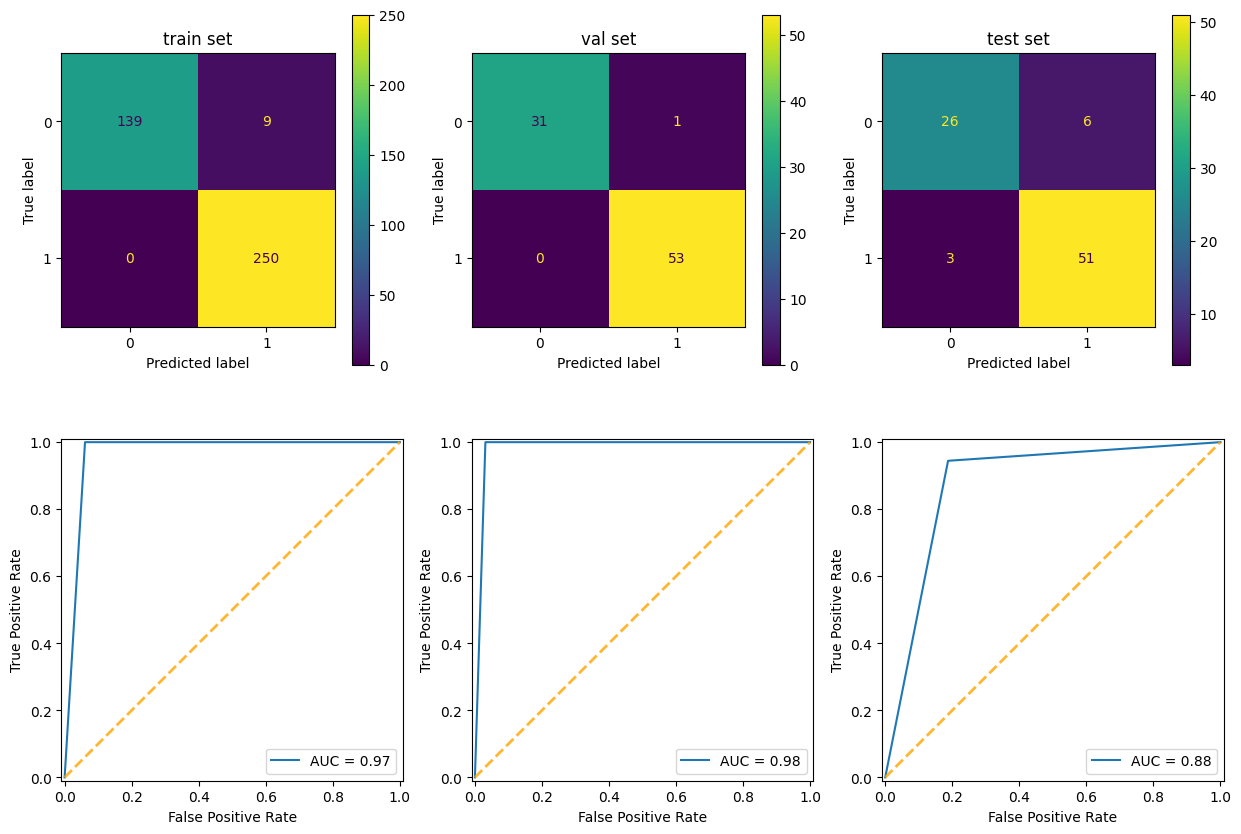

In [194]:
from sklearn.metrics import (
    RocCurveDisplay,
    auc,
    roc_curve,
    ConfusionMatrixDisplay,
    confusion_matrix,
)
import matplotlib.pyplot as plt


sets_ = {"train": (X_train, y_train), "val": (X_val, y_val), "test": (X_test, y_test)}


def evaluate_model(m, sets_):
    plot_auc = m.models[0].get_xgb_params()["num_class"] == 2
    fig, ax = plt.subplots(1 if not plot_auc else 2, 3, figsize=(15, 10))
    axes_ = ax.flatten()
    for i, set_ in enumerate(sets_):
        X_, y_ = sets_[set_]
        y_pred = m.predict(X_)
        ConfusionMatrixDisplay(confusion_matrix(y_, y_pred)).plot(ax=axes_[i])
        axes_[i].set_title(f"{set_} set")

        if plot_auc:
            y_pred_probs = m.predict_proba(X_)
            fpr, tpr, thresholds = roc_curve(y_, np.argmax(y_pred_probs, axis=1))
            roc_auc = auc(fpr, tpr)
            RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=axes_[i + 3])
            # plot dummy classifier line
            axes_[i + 3].plot(
                [0, 1],
                [0, 1],
                linestyle="--",
                lw=2,
                color="orange",
                label="Random classifier",
                alpha=0.8,
            )
    plt.show()


evaluate_model(m=model, sets_=sets_)

In [69]:
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

model_parameters = {
    "train_params": {
        "xgb": {
            "dtrain": None,
            "evals": [(None, "train"), (None, "val")],
            "num_boost_round": 10,
            "early_stopping_rounds": 3,
            "verbose_eval": 0,
        },
        "lgb": {
            "train_set": None,
            "valid_sets": [None, None],
            "num_boost_round": 10,
            "callbacks": [
                lgb.early_stopping(
                    stopping_rounds=3,
                    verbose=False,
                ),
                lgb.log_evaluation(period=0),
            ],
        },
        "ctb": {
            "pool": None,
            "eval_set": None,
            "num_boost_round": 10,
            "early_stopping_rounds": 3,
            "verbose": 0,
        },
        "final_model": {
            "dtrain": None,
            "evals": [(None, "train"), (None, "val")],
            "num_boost_round": 10,
            "early_stopping_rounds": 3,
            "verbose_eval": 0,
        },
    },
    "params": {
        "classification": {
            "xgb": {
                "objective": "multi:softprob",
                "eval_metric": "mlogloss",
                "num_class": None,
            },
            "lgb": {
                "objective": "multiclass",
                "metric": "multi_logloss",
                "num_class": None,
                "verbose": -1,
            },
            "ctb": {
                "loss_function": "Logloss",
            },
            "final_model": {
                "objective": "multi:softmax",
                "eval_metric": "mlogloss",
                "num_class": None,
            },
        },
        "regression": {
            "xgb": {
                "objective": "reg:squarederror",
            },
            "lgb": {
                "objective": "regression",
            },
            "ctb": {
                "loss_function": "RMSE",
            },
            "final_model": {
                "objective": "reg:squarederror",
            },
        },
    },
}


def fill_params(
    X_train,
    y_train,
    X_val,
    y_val,
    model_parameters: dict = None,
    task = 'classification'
):  

    model_parameters["train_params"]["xgb"]["dtrain"] = xgb.DMatrix(X_train, y_train)
    model_parameters["train_params"]["xgb"]["evals"] = [
        (model_parameters["train_params"]["xgb"]["dtrain"], "train"),
        (xgb.DMatrix(X_val, y_val), "val"),
    ]
    model_parameters["train_params"]["lgb"]["train_set"] = lgb.Dataset(
        X_train, label=y_train
    )
    model_parameters["train_params"]["lgb"]["valid_sets"] = [
        model_parameters["train_params"]["lgb"]["train_set"],
        lgb.Dataset(X_val, label=y_val),
    ]
    model_parameters["train_params"]["ctb"]["pool"] = ctb.Pool(X_train, label=y_train)
    model_parameters["train_params"]["ctb"]["eval_set"] = ctb.Pool(X_val, label=y_val)

    if task  == "classification":
        n_classes = len(set(y_train)&set(y_val))
        model_parameters["params"][task]["xgb"]["num_class"] = n_classes
        model_parameters["params"][task]["lgb"]["num_class"] = n_classes
        model_parameters["params"][task]["final_model"]["num_class"] = n_classes
    return model_parameters

model_parameters = fill_params(X_train, y_train, X_val, y_val, model_parameters)


task = "classification"
xgb_model = xgb.train(
    model_parameters["params"][task]["xgb"], **model_parameters["train_params"]["xgb"]
)
lgb_model = lgb.train(
    model_parameters["params"][task]["lgb"], **model_parameters["train_params"]["lgb"]
)
ctb_model = ctb.train(
    **model_parameters["train_params"]["ctb"],
    params=model_parameters["params"][task]["ctb"]
)
models = [xgb_model, lgb_model, ctb_model]

# Get meta features
sets_ = (X_train,y_train,X_val,y_val)
def get_meta_features(models, X_train,y_train,X_val,y_val):

    # Train
    xgb_preds = xgb_model.predict(xgb.DMatrix(X_train),strict_shape=True)
    lgb_preds = lgb_model.predict(X_train)
    ctb_preds = ctb_model.predict(X_train, prediction_type="Probability")

    # For now, no predict probas

    X_train_meta = pd.concat(
        [pd.DataFrame(xgb_preds), pd.DataFrame(lgb_preds), pd.DataFrame(ctb_preds)],
        axis=1,

    )
    # NOTE: getattr from dict works nicely
    n_cols = model_parameters['params'][task]['final_model']['num_class']
    X_train_meta.columns = [
        f"{model.__class__.__name__}_{i}"
        for model in ['xgb','lgb','ctb']
        for i in range(n_cols)
    ]

dtrain_meta = xgb.DMatrix(X_train_meta, dy)
dval_meta = xgb.DMatrix()
# # Ensemble model
# final_model = xgb.train(
#     model_parameters["params"][task]["xgb"], **model_parameters["train_params"]["xgb"]
# )

In [68]:
model_parameters["train_params"]['ctb']

{'pool': <catboost.core.Pool at 0x2bd9f1310>,
 'eval_set': <catboost.core.Pool at 0x2bd970830>,
 'num_boost_round': 10,
 'early_stopping_rounds': 3,
 'verbose': 0}

In [64]:
ctb.train(**model_parameters["train_params"]["ctb"])

AttributeError: 'CatBoost' object has no attribute 'train'